<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1c2NOMFBvEJnrwEHkJKttmXGE2NE7a1RP" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

---

# **Licencia**

**Autor**: Juan Francisco Puentes Calvo

**Licencia**: GPL v3 (https://www.gnu.org/licenses/gpl-3.0.html)


# **Reconocimientos**

* Ninguno, por ahora.

---

## Lectura de imagen y mostrar una parte con un zoom

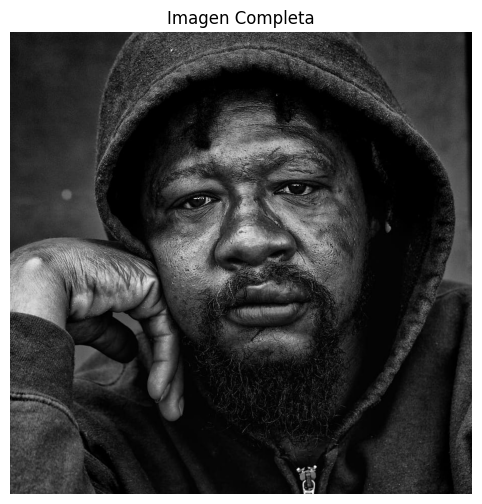

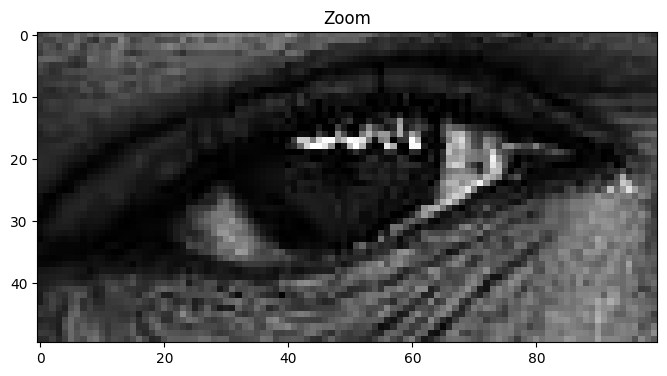

In [2]:
# prompt: Genera el python el código para leer una imagen desde una url, mostrarla por completo con un tamaño limitado y mostrar un "zoom" de una región específica en donde se puedan ver los pixels.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# URL de la imagen (Autor: Leroy_Skalstad (pixabay). )
url = "https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/buenaresolución.png"

# Obtener la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen completa con un tamaño limitado
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Imagen Completa")
plt.axis('off')
plt.show()

# Definir la región para el zoom
x1, y1 = 320, 310;
ix, iy = 100, 50;
zoom = img.crop((x1, y1, x1+ix, y1+iy))

# Mostrar el zoom con los píxeles visibles
plt.figure(figsize=(8, 6))
plt.imshow(zoom)
plt.title("Zoom")
plt.show()


## Histograma de una imagen

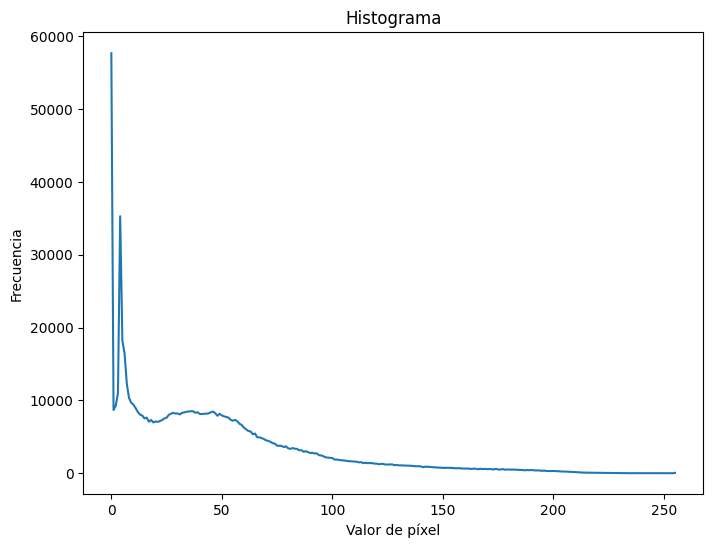

In [ ]:
# prompt: Dada una imagen dada con una url, calcula y muestra su histograma. La gráfica ha de ser sólo una línea.

import matplotlib.pyplot as plt
# URL de la imagen (Autor: Leroy_Skalstad (pixabay). )
url = "https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/buenaresolución.png"

# Obtener la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Convertir la imagen a escala de grises
img_gray = img.convert('L')

# Calcular el histograma
hist = img_gray.histogram()

# Mostrar el histograma
plt.figure(figsize=(8, 6))
plt.plot(hist)
plt.title("Histograma")
plt.xlabel("Valor de píxel")
plt.ylabel("Frecuencia")
plt.show()


In [7]:
# prompt: Dada una imagen obtenida de una url, leerla, separar los canales RGB y mostrarlos en una fila. A cada imagen, dale el tono que le corresponde.

import matplotlib.pyplot as plt
# URL de la imagen
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Synthese%2B.svg/640px-Synthese%2B.svg.png"

# Obtener la imagen desde la URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Separar los canales RGB
r, g, b = img.split()

# Crear una figura con tres subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar cada canal con su tono correspondiente
axes[0].imshow(r, cmap='Reds')
axes[0].set_title("Canal Rojo")
axes[0].axis('off')

axes[1].imshow(g, cmap='Greens')
axes[1].set_title("Canal Verde")
axes[1].axis('off')

axes[2].imshow(b, cmap='Blues')
axes[2].set_title("Canal Azul")
axes[2].axis('off')

plt.show()


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7b14692071a0>

## Convolución: detección de bordes.

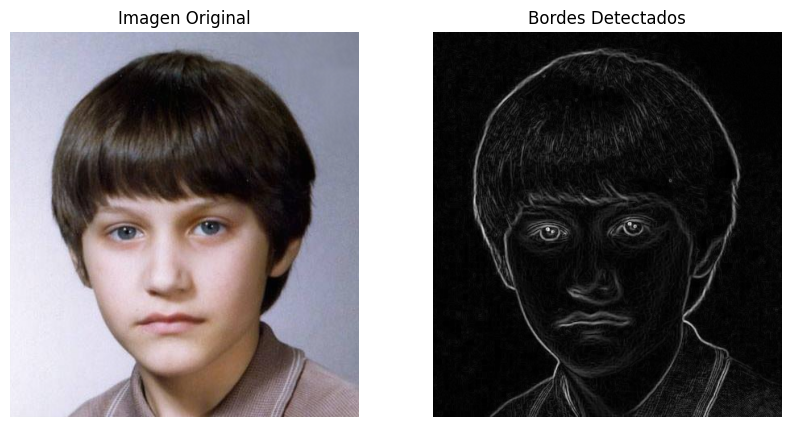

In [ ]:
# prompt: Dada una imagen, dada mediante una url, aplicar un filtro de convolución para detectar los bordes. Si tiene más canales, aplícalo a cada canal y luego juntalo de nuevo.Representa también el filtro como una imagen. Usa la librería skimage.

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

# URL de la imagen (pixabay)
url = "https://raw.githubusercontent.com/FranPuentes/iTI2025/main/data/joven.png"

# Obtener la imagen desde la URL
img = imread(url)

# Convertir la imagen a escala de grises si tiene más de un canal
if len(img.shape) > 2:
  img_gray = rgb2gray(img)
else:
  img_gray = img

# Aplicar el filtro Sobel para detección de bordes
edges = sobel(img_gray)

# Mostrar la imagen original y la imagen con bordes detectados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title('Imagen Original')

axes[1].imshow(edges, cmap=plt.cm.gray)
axes[1].set_title('Bordes Detectados')

for ax in axes:
  ax.axis('off')

plt.show()

# Mostrar el filtro como una imagen
# (En este caso, el filtro Sobel no se visualiza como una imagen
#  tradicional, ya que es un operador matemático)
